## <u>Part One - PROJECT BASED </u>

• <b>DOMAIN:</b>  Digital content and entertainment industry
 

• <b>CONTEXT:</b> : The objective of this project is to build a text classification model that analyses the customer's sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.

• <b>DATA DESCRIPTION:</b> The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most frequent word. Use the first 20 words from each review to speed up training,using a max vocabulary size of 10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.<br>

• <b>PROJECT OBJECTIVE:</b> :  Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.

<b>Steps and tasks: </b>

1. Import and analyse the data set.<br>
Hint: - Use `imdb.load_data()` method<br>
      - Get train and test set<br>
      - Take 10000 most frequent words
2. Perform relevant sequence adding on the data<br>
    
3. Perform following data analysis:<br>
  • Print shape of features and labels<br>
  • Print value of any one feature and it's label
4. Decode the feature value to get original sentence<br>
5. Design, train, tune and test a sequential model.<br>
Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN
classifiers. Be analytical and experimental here in trying new approaches to design the best model.<br>
6. Use the designed model to print the prediction on any one sample.



### <u>Solution</u>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import libraries
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.8.0'

In [3]:
#Importing the dataset and getting train data
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, Conv1D, GlobalMaxPool1D, LSTM, TimeDistributed, Flatten
from matplotlib import pyplot
from tensorflow.keras.datasets import imdb

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000, maxlen=300) #Takiong 10000 most frequent words

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
#Printing the shape of our data
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)

(19051,)
(19450,)
[1 0 0 ... 0 1 0]
[0 1 0 ... 0 0 0]


In [5]:
# Number of Labels
print("Labels: ")
print(np.unique(y_train))

Labels: 
[0 1]


In [6]:
#Checking the maximum length of each sequence
X_train_max_len = max(len(x) for x in X_train)
print("Max length of sequence in X_train: {}".format(X_train_max_len))

X_test_max_len = max(len(x) for x in X_test)
print("Max length of sequence in X_test:  {}".format(X_test_max_len))

Max length of sequence in X_train: 299
Max length of sequence in X_test:  299


###Perform relevant sequence adding on the data

Review length: 
Mean 159.68 words (60.730229)


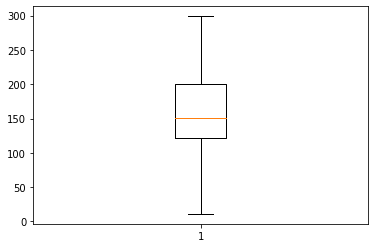

In [7]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()
#Visualizing th length of the review

In [8]:
data = np.concatenate((X_train, X_test), axis=0)
labels = np.concatenate((y_train, y_test), axis=0)  #Concatenating both 

In [9]:
#padding to 300 length

from keras.preprocessing.sequence import pad_sequences
data_padded = pad_sequences(data, padding='post', maxlen=300)#Sequence added

Print shape of features & labels

In [10]:
print('Number of reviews: {}, Number of words in each review: {}'.format(data_padded.shape[0],data_padded.shape[1]))


Number of reviews: 38501, Number of words in each review: 300


In [11]:
#Number of labels
print('Number of labels: {}'.format(labels.shape[0]))



Number of labels: 38501


Print value of any one feature and it's label

In [12]:
#Feature value
print("Value of the 22nd review:" ,data_padded[22])

Value of the 22nd review: [   1   75   69    8  140    8   35    2   38   75  679   23    4    2
    8 1853    4  277  103   12   16  120   13  610   33   61  658    5
  301   81   25   28    6 2307   29    2   27  419   57   13  301   38
   25   93   72  106    4  130    7   14   20    5   13   28   57 2307
   51   43  575   29  161   97   72   21   25  124   10   10    4   20
  648  410   16  179   52   50   16    6  176    7  836   12  828   25
 1535   95  385    4  277    4  277   16   73   12   43 1054   25 1173
  387   11   23   51  575   42  138  208   56  366    4  898   13  828
  536  142   62  593    8 1260   12   21   12  115  122   38   13  385
  133 1017  294 2626   12   46    5   13   43  286 2648  692 5898  133
  689  153  303  146   43   17 5753   17  827    2   16   10   10   13
  131   28   57 2307   51  435   23  146   43 1264   13  161  437  101
    8  818   12   88   13  252   62   28   77 1168   10   10    2   13
   79   12    4  130    7    4   20    9   51 4332 

In [13]:
#Label value
print("Sentiment Label:", labels[22])

Sentiment Label: 0


###Decode the feature value to get original sentence

In [14]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#Retrieving a dictionary that contains the mapping of words to their index in the dataset

1654784/1641221 [==============================] - 0s 0us/step


In [15]:
print(" ".join([reverse_word_index.get(n-3, '#') for n in data_padded[10]]))
#From the dictionary get the original words from the encodings for a particular sentence.

# anyone who could find redeeming value in this piece of crap ought to have their head examined we have the # heroin addicted part time hooker wife with # all over her body # received from repeated # by an abusive son now she is # breast milk all over the kitchen floor the release so gained somehow akin to helen # placing her hands in running water we have the husband who starts out by # a prostitute who just happens to be his daughter she's upset with him because he came too quickly and ends by murdering his female colleague having sex with her corpse and then # her up we have the kid who is relentlessly # by his classmates and who comes home and beats his mom you see it's all # deep huh the only decent moment in this horrendous pile of tripe is when the dad murders his son's # it's a good thing this turkey was shot on video because otherwise what a waste of expensive film it would be if that guy who thinks artists ought to be interested in this # is really serious no wonder most peop

In [16]:
labels[10]
#We can confirm  the review is bad from the label and review itself

0

###Design, train, tune and test a sequential model.

In [17]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(data_padded, labels, test_size=0.20, random_state=0)

In [18]:
#Defining a sequential model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=100, input_length=300))
model.add(LSTM(units=100, return_sequences=True, dropout=0.2))
model.add(TimeDistributed(Dense(100)))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [19]:
#Compiling the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [20]:
print(model.summary())
#Model Summary

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 300, 100)          80400     
                                                                 
 time_distributed (TimeDistr  (None, 300, 100)         10100     
 ibuted)                                                         
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 30001     
                                                                 
Total params: 1,120,501
Trainable params: 1,120,501
Non-trainable params: 0
______________________________________________

In [21]:
model.fit(train_X, np.array(train_y), batch_size=300, epochs=5, validation_split=0.1, verbose=1)#Fitting the model

Epoch 1/5
93/93 [==============================] - 10s 42ms/step - loss: 0.4168 - accuracy: 0.7890 - val_loss: 0.2721 - val_accuracy: 0.8893
Epoch 2/5
93/93 [==============================] - 3s 36ms/step - loss: 0.2129 - accuracy: 0.9156 - val_loss: 0.2740 - val_accuracy: 0.8883
Epoch 3/5
93/93 [==============================] - 3s 36ms/step - loss: 0.1653 - accuracy: 0.9361 - val_loss: 0.2948 - val_accuracy: 0.8951
Epoch 4/5
93/93 [==============================] - 3s 37ms/step - loss: 0.1385 - accuracy: 0.9475 - val_loss: 0.3182 - val_accuracy: 0.8867
Epoch 5/5
93/93 [==============================] - 3s 36ms/step - loss: 0.0975 - accuracy: 0.9642 - val_loss: 0.4137 - val_accuracy: 0.8718


In [22]:
#Evaluating the model
scores, accuracy = model.evaluate(test_X, test_y)
print("Score: {:.4f}".format(scores))
print("Accuracy: {:.4f}".format(accuracy))

241/241 [==============================] - 2s 6ms/step - loss: 0.4407 - accuracy: 0.8664
Score: 0.4407
Accuracy: 0.8664


We got an accuracy of 87%

###Use the designed model to print the prediction on any one sample

In [23]:
print('Prediction: {} | Ground Truth: {}'.format(((model.predict(test_X[2].reshape(-1,300)) > 0.5).astype("int32").flatten()), test_y[2]))


Prediction: [1] | Ground Truth: 1


We can see that our model has successfully predicted

## <u>Part Two - PROJECT BASED </u>

• <b>DOMAIN:</b>  Social media analytics
 

• <b>CONTEXT:</b> : Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project, the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.


• <b>DATA DESCRIPTION:</b> The dataset is collected from two news websites, theonion.com and huffingtonpost.com.<br>
This new dataset has the following advantages over the existing Twitter datasets:<br>
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This reduces the sparsity and also increases the chance of finding pre-trained embeddings. Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as compared to Twitter datasets.<br>
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the real sarcastic elements.
Content: Each record consists of three attributes:<br>
is_sarcastic: 1 if the record is sarcastic otherwise 0<br>
headline: the headline of the news article<br>
article_link: link to the original news article. Useful in collecting supplementary data<br>
Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection<br>

• <b>PROJECT OBJECTIVE:</b> : Build a sequential NLP classifier which can use input text parameters to determine the customer sentiments.<br>

<b>Steps and tasks:   </b>

1. Read and explore the data<br>
2. Retain relevant columns<br>
    
3. Get length of each sentence<br>
4. Define parameters<br>
5. Get indices for words<br>
6. Create features and labels<br>
7. Get vocabulary size<br>
8. Create a weight matrix using GloVe embeddings.<br>
9. Define and compile a Bidirectional LSTM model.<br>
 Hint: Be analytical and experimental here in trying new approaches to design the best model.<br>
10. Fit the model and check the validation accuracy




### <u>Solution</u>

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, ImageColorGenerator
from bs4 import BeautifulSoup
import string
import re
import nltk
from nltk.corpus import stopwords


###Read and explore the data

In [25]:
data = pd.read_json('/content/drive/MyDrive/AIML/Labs/CV/Sarcasm_Headlines_Dataset.json', lines = True)
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [26]:
print(f'Data has {data.shape[0]} rows and {data.shape[1]} columns')

Data has 28619 rows and 3 columns


In [27]:
data.info()
#Summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [28]:
data.isnull().sum()


is_sarcastic    0
headline        0
article_link    0
dtype: int64

From above two we can say that there are no null values present.


In [29]:
df_sarcasm = data.is_sarcastic.value_counts().to_frame()
df_sarcasm#Checking the distribution of our integer value(our target )

,is_sarcastic
0,14985
1,13634


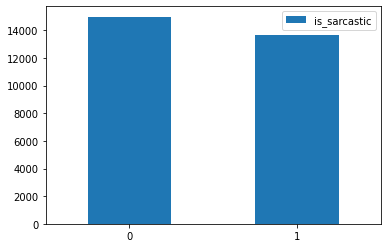

In [30]:
df_sarcasm.plot(kind = 'bar')
plt.xticks(rotation = 0);

We can see that Non Sarcastic headlines are higher by a small margin

In [31]:
hf = data[data['article_link'].str.contains('huffingtonpost.com')]
op = data[data['article_link'].str.contains('theonion.com')]  #Storing the df of both source providers

In [32]:
hf_is = hf[hf['is_sarcastic']==1].shape[0]
hf_not = hf[hf['is_sarcastic']==0].shape[0]
op_is = op[op['is_sarcastic']==1].shape[0]
op_not = op[op['is_sarcastic']==0].shape[0]




In [33]:
display(pd.DataFrame([[hf_is, op_is], [hf_not, op_not]], 
                     columns = ['huffingtonpost', 'theonion'], index = ['Sarcastic', 'Non-sarcastic']))

,huffingtonpost,theonion
Sarcastic,0,13634
Non-sarcastic,14985,1


From above we can conclude that huffingtonpost didn't provide any sarcastic post whereas theonion provided with 13636 sarcastic posts and 1 non sarcastic post

In [34]:
sarcastic_headlines = data.loc[data['is_sarcastic'] == 1]

non_sarcastic_headlines = data.loc[data['is_sarcastic'] == 0].sample(n = 13634, random_state = 25)
#We saw that both sarcastic and not sarcastic differ so we need to undersample 

In [35]:
text1 = ' '.join(review for review in sarcastic_headlines.headline)
print ('There are {} words in the combination of all sarcastic review.'.format(len(text1)))

There are 904356 words in the combination of all sarcastic review.


In [36]:
text2 = ' '.join(review for review in non_sarcastic_headlines.headline)
print ('There are {} words in the combination of all non sarcastic review.'.format(len(text2)))

There are 825561 words in the combination of all non sarcastic review.


Word Cloud of Sarcastic Headlines

(-0.5, 399.5, 199.5, -0.5)

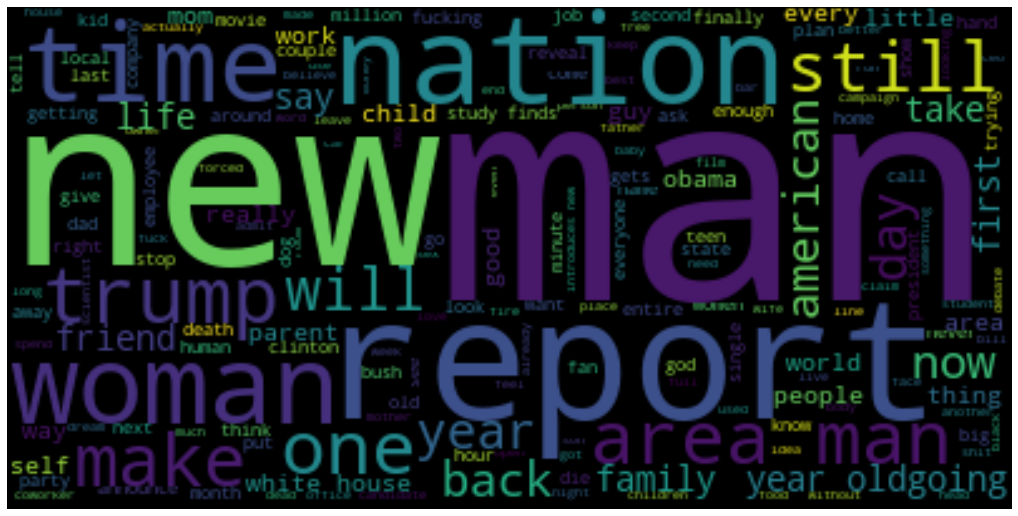

In [37]:


# Generate a word cloud image
wordcloud = WordCloud( background_color = "black").generate(text1)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

Word Cloud for Non Sarcastic Headlines

(-0.5, 399.5, 199.5, -0.5)

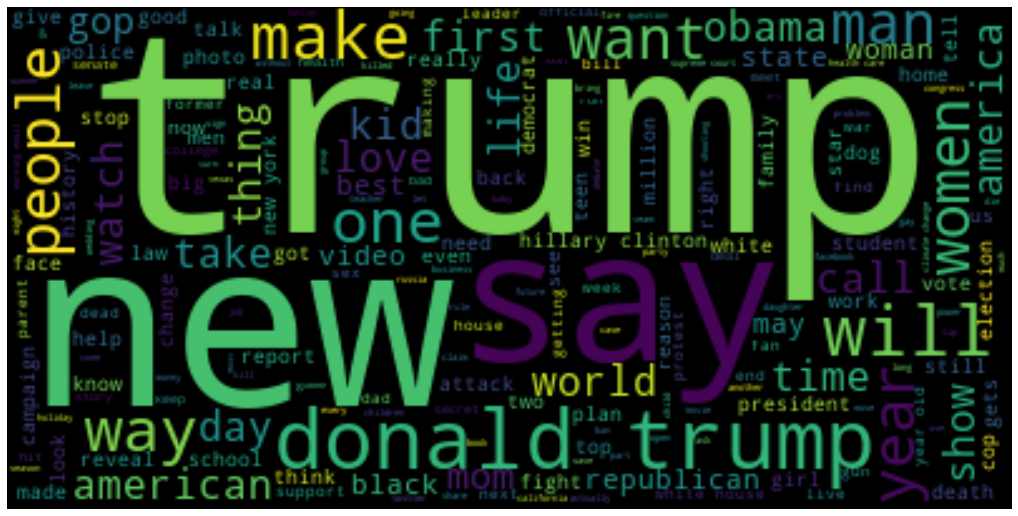

In [38]:


# Generate a word cloud image
wordcloud = WordCloud( background_color = "black").generate(text2)

# Display the generated image:
plt.figure(figsize = [18, 18])
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [39]:
new_data = pd.concat([sarcastic_headlines,non_sarcastic_headlines])  #Joining since we undersampled

###Retain relevant columns

In [40]:
# Column article_link is not needed so we are dropping it
new_data = new_data.drop(columns = 'article_link', axis = 1)
new_data.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...
7,1,richard branson's global-warming donation near...
8,1,shadow government getting too large to meet in...


###Get length of each sentence

In [41]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [42]:
#Before finding the length of each sentence we need to clean the headline
def clean_text(text, remove_stopwords=True):
  # Convert words to lower case
  text = text.lower()
  if True:
    text = text.split()
    new_text = []
    for word in text:
      if word in contractions:
        new_text.append(contractions[word])
      else:
        new_text.append(word)
      text = " ".join(new_text)
      text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
      text = re.sub(r'\<a href', ' ', text)
      text = re.sub(r'&amp;', '', text)
      text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
      text = re.sub(r'<br />', ' ', text)
      text = re.sub(r'\'', ' ', text)
      if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)
  return text

In [43]:
# Clean the headlines
from nltk.corpus import stopwords 
from pickle import dump, load

clean_balanced_headlines = []
for headline in new_data['headline']:
  clean_balanced_headlines.append(clean_text(headline, remove_stopwords = False))
print('Data is cleaned!')

Data is cleaned!


In [44]:
new_data['cleaned_headline'] = clean_balanced_headlines
new_data.head()

,is_sarcastic,headline,cleaned_headline
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...,mother comes pretty close to using word strea...
7,1,richard branson's global-warming donation near...,richard branson s global warming donation near...
8,1,shadow government getting too large to meet in...,shadow government getting too large to meet in...


In [45]:
new_data = new_data.drop('headline', axis = 1)
new_data.head()

,is_sarcastic,cleaned_headline
0,1,thirtysomething scientists unveil doomsday clo...
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word strea...
7,1,richard branson s global warming donation near...
8,1,shadow government getting too large to meet in...


In [46]:
print (new_data['cleaned_headline'][7])


richard branson s global warming donation nearly as much as cost of failed balloon trips


In [47]:
len(new_data['cleaned_headline'][7].split())


15

In [48]:
max_length = max([len(headline.split()) for headline in new_data['cleaned_headline']])
print('Maximum Length: ', max_length)

Maximum Length:  152


In [49]:
#Importing required modules
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

###Define parameters

In [50]:
max_features = 10000
maxlen = max_length 
embedding_size = 50

###Get indices for words

In [51]:
#Applying Keras Tokenizer for headline column
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(new_data['cleaned_headline'])

###Create features and labels

In [52]:
X = tokenizer.texts_to_sequences(new_data['cleaned_headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(new_data['is_sarcastic']).reshape((-1,1))

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 27268
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0  346 3067 6172 2090    2  646 1233]
Number of Labels:  27268
[1]


###Get vocabulary size

In [53]:
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: ', vocab_size)

Vocabulary Size:  25944


###Create a weight matrix using GloVe embeddings

In [54]:
EMBEDDING_FILE = '/content/drive/MyDrive/AIML/Labs/CV/glove.6B.50d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

In [55]:
embedding_matrix = np.zeros((vocab_size, 50))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

###Define and compile a Bidirectional LSTM model

In [56]:
### create the model
model = Sequential()

### Embedding layer for hint 
model.add(Embedding(vocab_size, embedding_size, weights = [embedding_matrix]))

### Bidirectional LSTM layer for hint 
model.add(Bidirectional(LSTM(512, return_sequences = True)))

### dense
model.add(Dense(256, activation = 'relu'))

##dropout
model.add(Dropout(0.5, input_shape = (256,)))

##sigmoid
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 50)          1297200   
                                                                 
 bidirectional (Bidirectiona  (None, None, 1024)       2306048   
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, None, 256)         262400    
                                                                 
 dropout (Dropout)           (None, None, 256)         0         
                                                                 
 dense_3 (Dense)             (None, None, 1)           257       
                                                                 
Total params: 3,865,905
Trainable params: 3,865,905
Non-trainable params: 0
____________________________________________

###Fit the model and check the validation accuracy

In [60]:
history = model.fit(X, y, batch_size = 100, epochs = 6, verbose = 1, validation_split = 0.2)

Epoch 1/6
219/219 [==============================] - 23s 106ms/step - loss: 0.6364 - accuracy: 0.6413 - val_loss: 1.0052 - val_accuracy: 0.0508
Epoch 2/6
219/219 [==============================] - 24s 107ms/step - loss: 0.4394 - accuracy: 0.7946 - val_loss: 0.2805 - val_accuracy: 0.8878
Epoch 3/6
219/219 [==============================] - 24s 109ms/step - loss: 0.2445 - accuracy: 0.9066 - val_loss: 0.2161 - val_accuracy: 0.9219
Epoch 4/6
219/219 [==============================] - 24s 110ms/step - loss: 0.1804 - accuracy: 0.9361 - val_loss: 0.2831 - val_accuracy: 0.8923
Epoch 5/6
219/219 [==============================] - 24s 110ms/step - loss: 0.1454 - accuracy: 0.9500 - val_loss: 0.6184 - val_accuracy: 0.7832
Epoch 6/6
219/219 [==============================] - 24s 110ms/step - loss: 0.1161 - accuracy: 0.9626 - val_loss: 0.5502 - val_accuracy: 0.8170


We got validation accuracy of 81.7%